# Exercises: Time Series Data Preparation

<hr style="border:2px solid gray">

The end result of this exercise should be a file named prepare.py.

<b>Part I</b>: Using your store items data:

1. Convert date column to datetime format.
2. Plot the distribution of sale_amount and item_price.
3. Set the index to be the datetime variable.
4. Add a 'month' and 'day of week' column to your dataframe.
5. Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.
6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.


<b>Part II</b>: Using the OPS data acquired in the Acquire exercises opsd_germany_daily.csv, complete the following:

1. Convert date column to datetime format.
2. Plot the distribution of each of your variables.
3. Set the index to be the datetime variable.
4. Add a month and a year column to your dataframe.
5. Fill any missing values.
6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

<hr style="border:2px solid gray">

In [1]:
#standard ds imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#datetime utilities
from datetime import timedelta, datetime

#custom imports
import acquire
import wrangle

#remove warnings
import warnings
warnings.filterwarnings("ignore")

### Part I: Using your store items data:

In [2]:
#assign dataframe from wrangle function
df = wrangle.acquire_store()

#take a look
df.head()

,sale_date,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode
0,2013-01-01,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
1,2013-01-02,11,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
2,2013-01-03,14,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
3,2013-01-04,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
4,2013-01-05,10,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253


<hr style="border:1px solid black">

<b>#1. Convert date column to datetime format.

In [3]:
#check current datatype of sales date
df.sale_date.dtypes

dtype('O')

In [4]:
#convert object to datetime
df.sale_date = df.sale_date.astype('datetime64[ns]')

In [5]:
#make sure it was changed
df.dtypes

sale_date        datetime64[ns]
sale_amount               int64
item_brand               object
item_name                object
item_price              float64
store_address            object
store_zipcode            object
dtype: object

<hr style="border:1px solid black">

<b>#2. Plot the distribution of sale_amount and item_price.

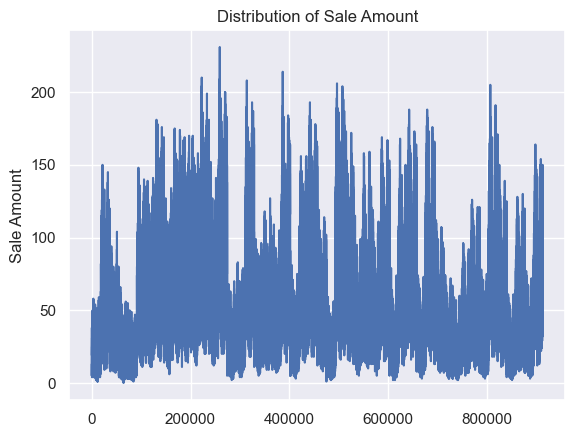

In [6]:
df.sale_amount.plot()
plt.title('Distribution of Sale Amount')
plt.ylabel('Sale Amount')
plt.show()

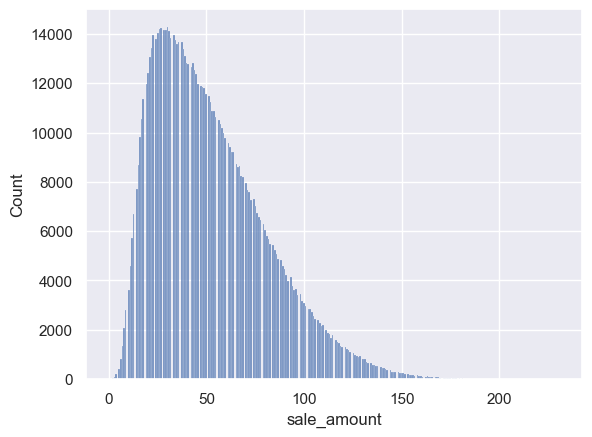

In [7]:
#plot the distribution
sns.histplot(data=df, x='sale_amount')
plt.show()

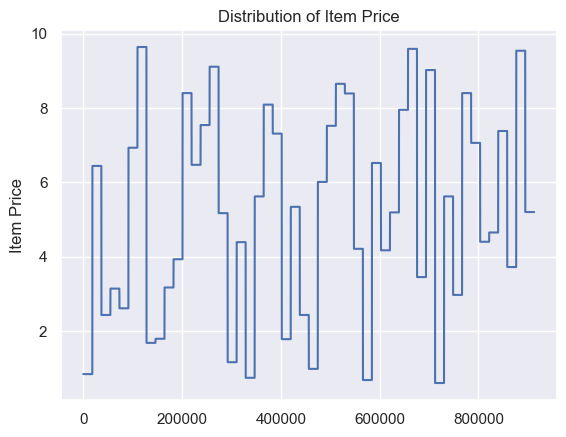

In [8]:
df.item_price.plot()
plt.title('Distribution of Item Price')
plt.ylabel('Item Price')
plt.show()

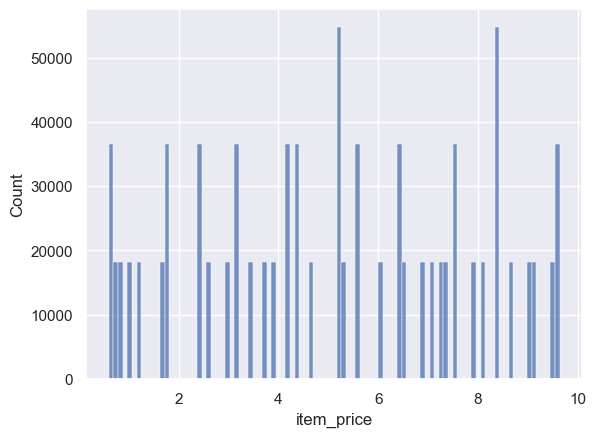

In [9]:
#plot the distribution
sns.histplot(data=df, x='item_price')
plt.show()

<hr style="border:1px solid black">

<b>#3. Set the index to be the datetime variable.

In [10]:
#check current index
type(df.index)

pandas.core.indexes.range.RangeIndex

In [11]:
#set index to sale date
df = df.set_index('sale_date').sort_index()

In [12]:
df.sample(3)

,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode
sale_date,,,,,,
2014-06-28,52,Doctors Best,Doctors Best Best Curcumin C3 Complex 1000mg T...,8.09,1520 Austin Hwy,78218
2017-07-03,87,Deerfields Gluten Free,Rice Bran Gluten Free Dinner Rolls Plain,7.95,12125 Alamo Ranch Pkwy,78253
2016-10-17,44,Twinings Of London,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,12125 Alamo Ranch Pkwy,78253


<hr style="border:1px solid black">

<b>#4. Add a 'month' and 'day of week' column to your dataframe.

In [13]:
df['month']= df.index.month_name()
df['day_of_week'] = df.index.day_name()

In [14]:
df.sample(2)

,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode,month,day_of_week
sale_date,,,,,,,,
2014-01-07,13,Burts Bees,Burts Bees Daily Moisturizing Cream Sensitive,5.17,12018 Perrin Beitel Rd,78217,January,Tuesday
2017-10-04,29,Boars Head,Boars Head Sliced White American Cheese - 120 Ct,3.14,8503 NW Military Hwy,78231,October,Wednesday


<hr style="border:1px solid black">

<b>#5. Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.

In [15]:
df['sales_total'] = df['sale_amount'] *df['item_price']

In [16]:
df.sample(2)

,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode,month,day_of_week,sales_total
sale_date,,,,,,,,,
2015-10-20,30,Careone,Careone Family Comb Set - 8 Ct,0.74,2118 Fredericksburg Rdj,78201,October,Tuesday,22.2
2017-03-21,35,Boars Head,Boars Head Sliced White American Cheese - 120 Ct,3.14,8503 NW Military Hwy,78231,March,Tuesday,109.9


<hr style="border:1px solid black">

<b>#6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [17]:
def convert_to_datetime(df):
    '''
    This function takes in a dataframe
    and converts the sales_date column to a datetime
    '''
    df.sale_date = pd.to_datetime(df.sale_date, infer_datetime_format=True)
    return df

<hr style="border:2px solid gray">

### Part II: Using the OPS data acquired in the Acquire exercises opsd_germany_daily.csv, complete the following:

In [18]:
germany = acquire.get_germany_data()
germany.head(3)

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN


<hr style="border:1px solid black">

<b> #1. Convert date column to datetime format.</b>

In [19]:
#check current dtype- object
germany.Date.dtypes

dtype('O')

In [20]:
#convert date time
germany.Date = germany.Date.astype('datetime64[ns]')

In [21]:
#make sure datatypes are changed
germany.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         4383 non-null   datetime64[ns]
 1   Consumption  4383 non-null   float64       
 2   Wind         2920 non-null   float64       
 3   Solar        2188 non-null   float64       
 4   Wind+Solar   2187 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 171.3 KB


<hr style="border:1px solid black">

<b> #2. Plot the distribution of each of your variables.</b>

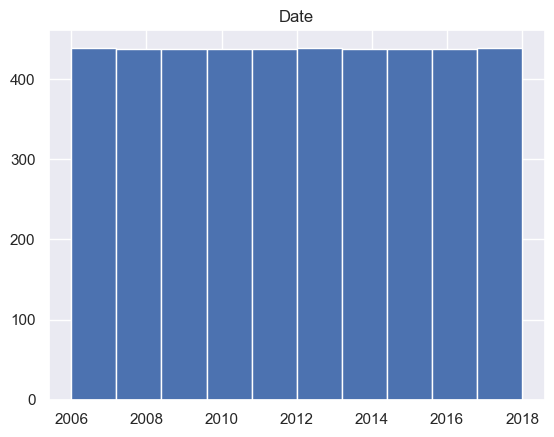

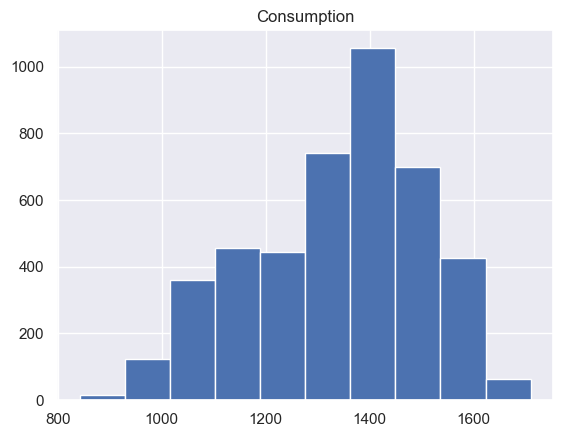

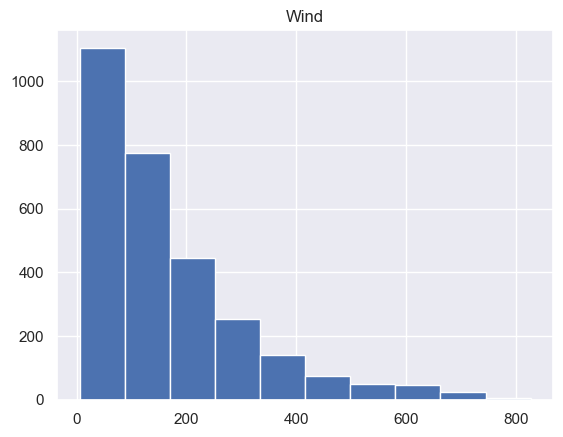

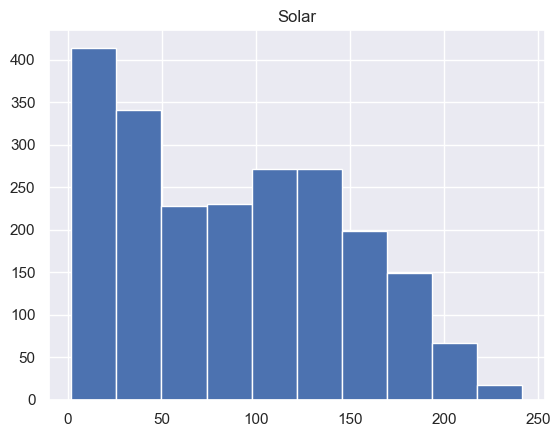

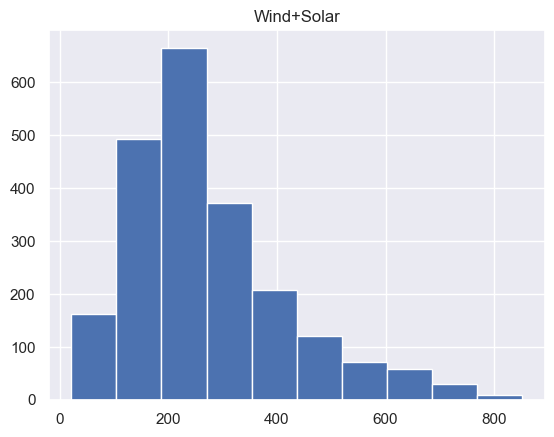

In [22]:
#visualize distribution
for col in germany.columns:
    plt.hist(germany[col])
    plt.title(col)
    plt.show()

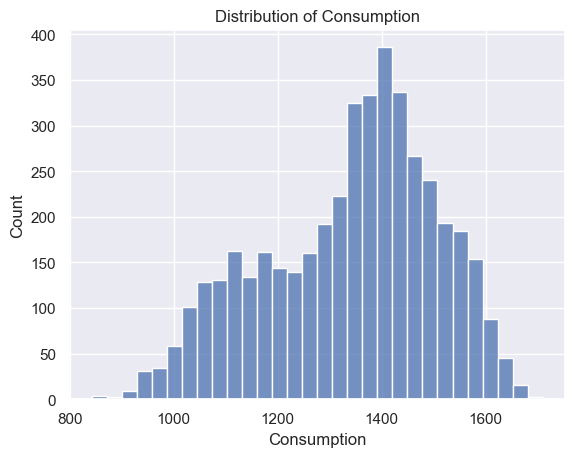

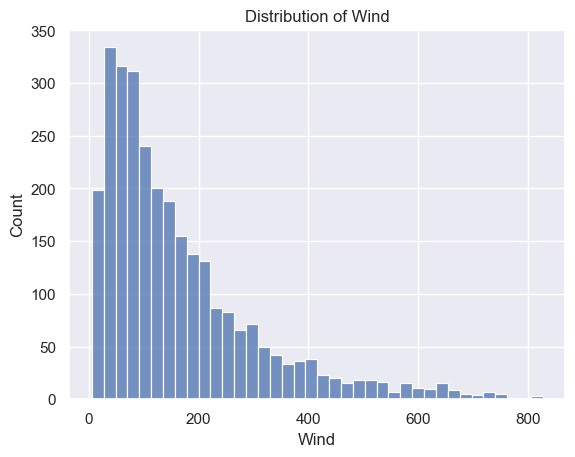

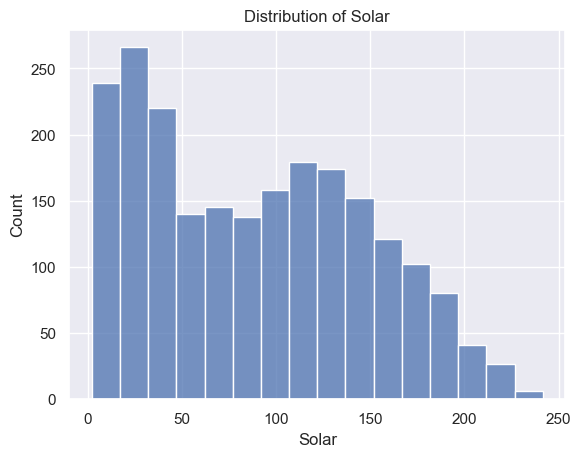

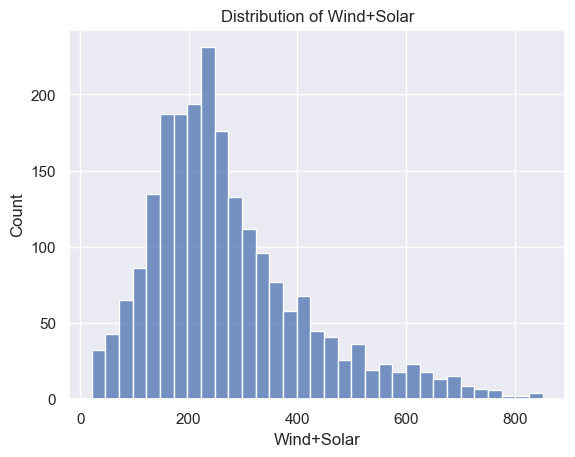

In [23]:
#complete the same thing using sns
for col in list(germany.columns.drop('Date')):
    plt.figure()
    sns.histplot(germany[col])
    plt.title('Distribution of {}'.format(col))

<hr style="border:1px solid black">

<b> #3. Set the index to be the datetime variable.</b>

In [24]:
#check current index
type(germany.index)

pandas.core.indexes.range.RangeIndex

In [25]:
#set and sort index to date
germany = germany.set_index('Date').sort_index()

In [26]:
#recheck index
type(germany.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [27]:
#take a look
germany.head(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN


<hr style="border:1px solid black">

<b> #4. Add a month and a year column to your dataframe.</b>

In [28]:
#create new column for month
germany['month'] = germany.index.month_name()

#create new column for year
germany['year'] = germany.index.year

In [29]:
#take a look
germany.head(3)

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,January,2006
2006-01-02,1380.521,NaN,NaN,NaN,January,2006
2006-01-03,1442.533,NaN,NaN,NaN,January,2006


<hr style="border:1px solid black">

<b> #5. Fill any missing values.</b>

In [30]:
#check for nulls
germany.isnull().sum()

Consumption       0
Wind           1463
Solar          2195
Wind+Solar     2196
month             0
year              0
dtype: int64

In [31]:
#for all columns, loop through null counts
for col in list(germany.columns):
    print(germany[col].isna().sum())

0
1463
2195
2196
0
0


In [32]:
#check all data
germany.info()

#nearly 50%nulls on some columns

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2006-01-01 to 2017-12-31
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Consumption  4383 non-null   float64
 1   Wind         2920 non-null   float64
 2   Solar        2188 non-null   float64
 3   Wind+Solar   2187 non-null   float64
 4   month        4383 non-null   object 
 5   year         4383 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 239.7+ KB


In [33]:
#fill nulls with 0
germany.fillna(0, inplace = True)

#take a look
germany.head(3)

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,January,2006
2006-01-02,1380.521,0.0,0.0,0.0,January,2006
2006-01-03,1442.533,0.0,0.0,0.0,January,2006


<hr style="border:1px solid black">

<b> #6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.</b>

In [34]:
def plot_distributions(df):
    for col in list(df.columns.drop('Date')):
        plt.figure()
        sns.histplot(df[col])
        plt.title('Distribution of {}'.format(col))